In [1]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


In [2]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('vehicle_accident_risk_dataset.csv')
df.head()

,speed,road_condition,visibility,traffic_density
0,52.44,moderate,clear,low
1,133.10,good,rainy,low
2,102.48,good,foggy,low
3,83.81,poor,rainy,low
4,21.84,moderate,clear,low


Shape: (200, 4)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   speed            200 non-null    float64
 1   road_condition   200 non-null    object 
 2   visibility       200 non-null    object 
 3   traffic_density  200 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.4+ KB
None

Cek nilai unik tiap kolom:
speed: [ 52.44 133.1  102.48  83.81  21.84   8.13 121.26  84.16  99.13   2.88
 135.79 116.54  29.73  25.46  25.68  42.59  73.47  60.47  40.77  85.66
  19.53  40.9   51.29  63.85 109.92  27.95  71.99  82.94   6.5   85.06
  23.87   9.11 132.84 135.19 113.18  42.65  13.67  95.79  61.62  17.09
  69.32   4.81 127.3   36.23  92.75  43.64  72.81  76.54  25.88 135.74
 108.52 131.53 125.28  83.71 129.06  12.39  27.44   6.33  45.55  54.41
  37.99 116.02  49.95  39.33  75.98  19.73 112.31  10.44 138.16 108.11
  2

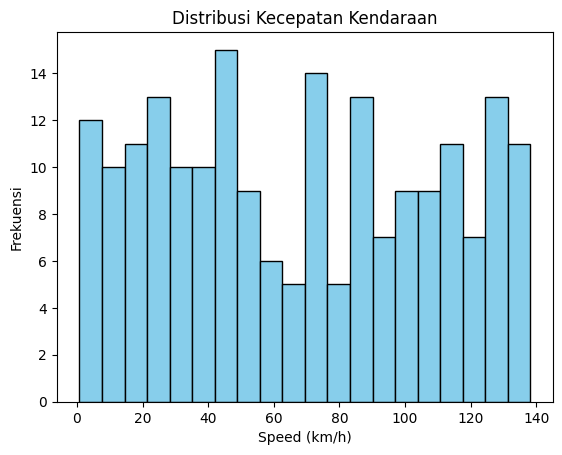

In [4]:
print("Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nCek nilai unik tiap kolom:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# Visualisasi distribusi kecepatan
plt.hist(df['speed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kecepatan Kendaraan')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frekuensi')
plt.show()


In [5]:
# Input Variables
speed = ctrl.Antecedent(np.arange(0, 141, 1), 'speed')
road_condition = ctrl.Antecedent(np.arange(0, 3, 1), 'road_condition')
visibility = ctrl.Antecedent(np.arange(0, 3, 1), 'visibility')
traffic_density = ctrl.Antecedent(np.arange(0, 3, 1), 'traffic_density')

# Output Variable
accident_risk = ctrl.Consequent(np.arange(0, 101, 1), 'accident_risk')


In [6]:

# Speed (0–140)
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 60])
speed['medium'] = fuzz.trimf(speed.universe, [40, 80, 120])
speed['high'] = fuzz.trimf(speed.universe, [100, 140, 140])

# Road condition (0=good, 1=moderate, 2=poor)
road_condition['good'] = fuzz.trimf(road_condition.universe, [0, 0, 1])
road_condition['moderate'] = fuzz.trimf(road_condition.universe, [0, 1, 2])
road_condition['poor'] = fuzz.trimf(road_condition.universe, [1, 2, 2])

# Visibility (0=clear, 1=foggy, 2=rainy)
visibility['clear'] = fuzz.trimf(visibility.universe, [0, 0, 1])
visibility['foggy'] = fuzz.trimf(visibility.universe, [0, 1, 2])
visibility['rainy'] = fuzz.trimf(visibility.universe, [1, 2, 2])

# Traffic density (0=low, 1=medium, 2=high)
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 1])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 1, 2])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [1, 2, 2])

# Accident risk (output 0–100)
accident_risk['low'] = fuzz.trimf(accident_risk.universe, [0, 0, 40])
accident_risk['medium'] = fuzz.trimf(accident_risk.universe, [30, 50, 70])
accident_risk['high'] = fuzz.trimf(accident_risk.universe, [60, 100, 100])


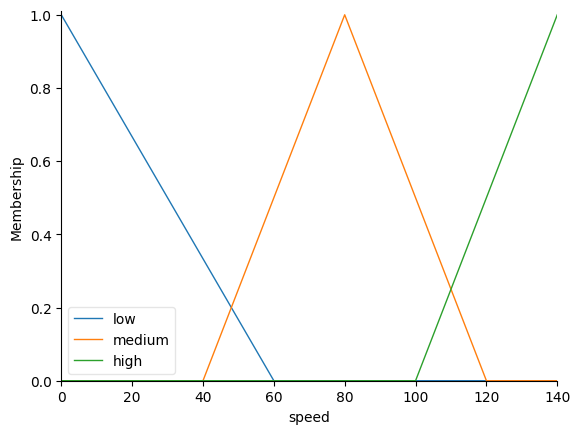

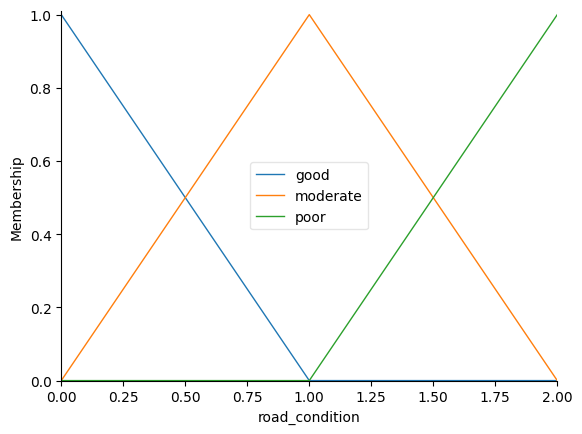

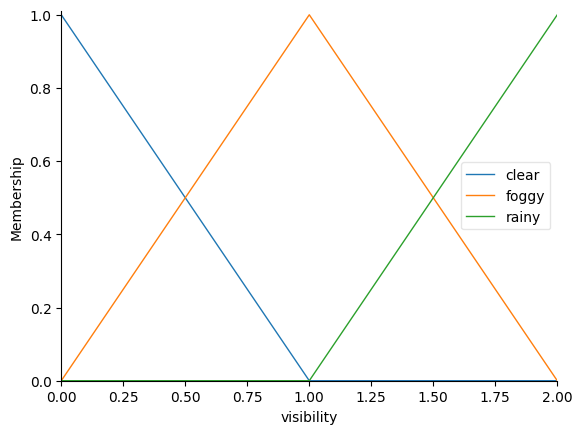

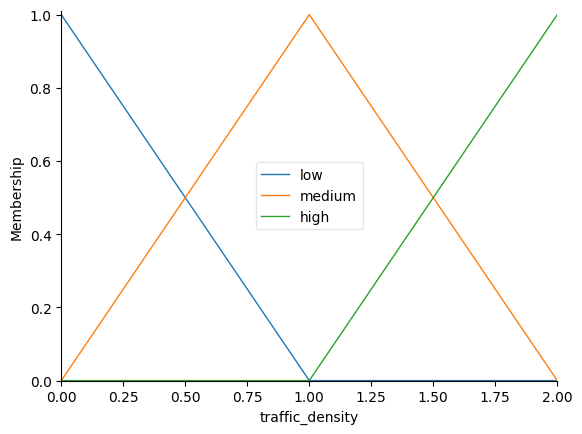

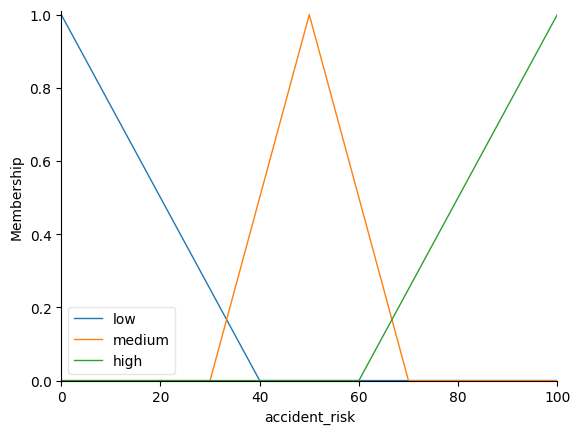

In [7]:

speed.view()
road_condition.view()
visibility.view()
traffic_density.view()
accident_risk.view()

In [8]:
rule1 = ctrl.Rule(speed['high'] & road_condition['poor'], accident_risk['high'])
rule2 = ctrl.Rule(speed['medium'] & road_condition['moderate'] & visibility['foggy'], accident_risk['medium'])
rule3 = ctrl.Rule(speed['low'] & road_condition['good'] & visibility['clear'], accident_risk['low'])
rule4 = ctrl.Rule(traffic_density['high'] & visibility['rainy'], accident_risk['high'])
rule5 = ctrl.Rule(speed['medium'] & traffic_density['medium'], accident_risk['medium'])
rule6 = ctrl.Rule(speed['low'] & traffic_density['low'] & road_condition['good'], accident_risk['low'])
rule7 = ctrl.Rule(speed['high'] & traffic_density['high'] & visibility['foggy'], accident_risk['high'])


In [9]:
accident_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
accident_sim = ctrl.ControlSystemSimulation(accident_ctrl)


Output keys: dict_keys(['accident_risk'])
Predicted Accident Risk: 50.00


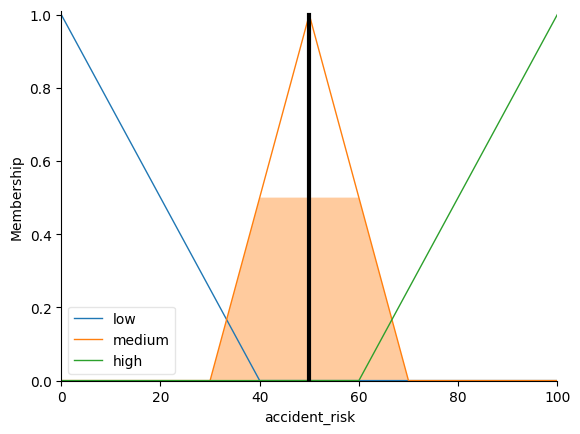

In [12]:
accident_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7,
    ctrl.Rule(speed['medium'], accident_risk['medium'])  # fallback rule
])

# Buat ulang simulasi
accident_sim = ctrl.ControlSystemSimulation(accident_ctrl)

# Input contoh data
accident_sim.input['speed'] = 100       # km/h
accident_sim.input['road_condition'] = 2  # 0=good, 1=moderate, 2=poor
accident_sim.input['visibility'] = 1      # 0=clear, 1=foggy, 2=rainy
accident_sim.input['traffic_density'] = 2 # 0=low, 1=medium, 2=high

# Jalankan simulasi
accident_sim.compute()

# Cek apakah output berhasil terbentuk
print("Output keys:", accident_sim.output.keys())

# Tampilkan hasil prediksi
if 'accident_risk' in accident_sim.output:
    print(f"Predicted Accident Risk: {accident_sim.output['accident_risk']:.2f}")
    accident_risk.view(sim=accident_sim)
else:
    print("⚠️ Output 'accident_risk' tidak ditemukan. Coba cek definisi rules atau rebuild sistem fuzzy.")

In [13]:
test_cases = [
    {'speed': 40, 'road_condition': 0, 'visibility': 0, 'traffic_density': 0},
    {'speed': 90, 'road_condition': 1, 'visibility': 1, 'traffic_density': 1},
    {'speed': 130, 'road_condition': 2, 'visibility': 2, 'traffic_density': 2},
]

for case in test_cases:
    accident_sim.input['speed'] = case['speed']
    accident_sim.input['road_condition'] = case['road_condition']
    accident_sim.input['visibility'] = case['visibility']
    accident_sim.input['traffic_density'] = case['traffic_density']
    accident_sim.compute()
    print(f"Input {case} => Risk: {accident_sim.output['accident_risk']:.2f}")

Input {'speed': 40, 'road_condition': 0, 'visibility': 0, 'traffic_density': 0} => Risk: 16.89
Input {'speed': 90, 'road_condition': 1, 'visibility': 1, 'traffic_density': 1} => Risk: 50.00
Input {'speed': 130, 'road_condition': 2, 'visibility': 2, 'traffic_density': 2} => Risk: 86.67
